# Part_1 version of our Retrieval Augmented Generation  
__Names and Uid__  
Albert Perez Paredes U214020  
Pol Garcia Lopez U214574

In [1]:
import nltk
import time
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\senyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the json

In [2]:
document_path = r"../../data/fashion_products_dataset.json"

import sys
from pathlib import Path
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))
from myapp.search.load_corpus import load_corpus
docs = load_corpus(document_path)

### Implementation

__Preprocessing documents__

In [3]:
from myapp.search.algorithms import create_index_tfidf, compute_line_docs
start_time = time.time()
docs = compute_line_docs(docs)
print("Total time to preprocess documents: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to preprocess documents: 38.75 seconds


__Index_tfidf__  
Not needed yet but we wanted to advance a little bit the work

In [4]:
start_time = time.time()
num_documents = len(docs)
index, tf, df, idf, title_index = create_index_tfidf(docs, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the index: 10.01 seconds


__Querying__  


In [5]:
from myapp.search.algorithms import search_tfidf
print("Insert your query (i.e.: women full sleeve sweatshirt cotton):\n")
#query = input()
query = "women full sleeve sweatshirt cotton"
ranked_docs = search_tfidf(query, index, idf, tf, title_index)
top = 30

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top]:
    print("page_id= {} - page_title: {}".format(d_id, title_index[d_id]))

Insert your query (i.e.: women full sleeve sweatshirt cotton):


Top 30 results out of 456 for the searched query:

page_id= SWSFMTNHEM5SNHVZ - page_title: Full Sleeve Solid Women Sweatshirt
page_id= SWSFXMFPPZGDQGMW - page_title: Full Sleeve Striped Women Sweatshirt
page_id= SWSFXMFPDVRHYYPH - page_title: Full Sleeve Striped Women Sweatshirt
page_id= SWSFV5JNDCDYTNQY - page_title: Full Sleeve Printed Women Sweatshirt
page_id= SWSFXZWGMGVDUCXA - page_title: Full Sleeve Printed Women Sweatshirt
page_id= SWSFXMFPNZQGZZNE - page_title: Full Sleeve Printed Women Sweatshirt
page_id= SWSFXMFP2RUM86QD - page_title: Full Sleeve Printed Women Sweatshirt
page_id= SWSFV5JNYHKCWHHX - page_title: Full Sleeve Color Block Women Sweatshirt
page_id= SWSFXYRYTHZWSZPE - page_title: Full Sleeve Graphic Print Women Sweatshirt
page_id= SWSFWTND3EPMFCQD - page_title: Full Sleeve Solid Women Sweatshirt
page_id= SWSFWTNDJFCF72WU - page_title: Full Sleeve Solid Women Sweatshirt
page_id= SWSFYFFYQ7Z3ZKN6 - page_

# Exploratory Data Analysis

__Understanding the dataset__

In [6]:
display(docs["TKPFCZ9EA7H5FYZH"])

Document(pid='TKPFCZ9EA7H5FYZH', title='Solid Women Multicolor Track Pants', description='Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India', brand='York', category='Clothing and Accessories', sub_category='Bottomwear', product_details={'Style Code': '1005COMBO2', 'Closure': 'Elastic', 'Pockets': 'Side Pockets', 'Fabric': 'Cotton Blend', 'Pattern': 'Solid', 'Color': 'Multicolor'}, seller='Shyam Enterprises', out_of_stock=False, selling_price=921.0, discount=69.0, actual_price=2999.0, average_rating=3.9, url='https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&iid=177a46eb-d053-4732-b3de-fcad6ff59cbd.TKPFCZ9EA7H5FYZH.SEARCH&ssid=utkd4t3gb40000001612415717799', images=['https://rukminim1.flixcart.com/image/128/1

In [7]:
display(docs["TKPFCZ9EA7H5FYZH"].title)

'Solid Women Multicolor Track Pants'

In [8]:
print("Total documents:", len(docs))

Total documents: 28080


__Statistical overview__

In [9]:
title_word_count = 0
descriptions_word_count = 0
sell_price = 0
actual_price = 0
min_price = float('inf')
max_price = float('-inf')
max_discount = float('-inf')
num_out_of_stock = 0
for doc in docs.values():
    if getattr(doc, "title", None):
        title_word_count += len(doc.title.split())
    if getattr(doc, "description", None):
        descriptions_word_count += len(doc.description.split())
    if getattr(doc, "selling_price", None):
        sell_price += float(doc.selling_price)
        min_price = min(min_price, float(doc.selling_price))
        max_price = max(max_price, float(doc.selling_price))
    if getattr(doc, "actual_price", None):
        actual_price += float(doc.actual_price)
    if getattr(doc, "discount", None):
        max_discount = max(max_discount, float(doc.discount))
    if getattr(doc, "out_of_stock", None):
        if doc.out_of_stock == True:
            num_out_of_stock += 1

average_title_length = title_word_count / len(docs)
print("Average title length (in words):", np.round(average_title_length, 2))

average_description_length = descriptions_word_count / len(docs)
print("Average description length (in words):", np.round(average_description_length, 2))

average_selling_price = sell_price / len(docs)
print("Average selling price:", np.round(average_selling_price, 2))

average_actual_price = actual_price / len(docs)
print("Average actual price:", np.round(average_actual_price, 2))
print("Minimum selling price:", np.round(min_price, 2))
print("Maximum selling price:", np.round(max_price, 2))
print("Maximum discount percentage:", np.round(max_discount, 2))
print("Percentage of out of stock products:", (num_out_of_stock / len(docs)) * 100, "%")

Average title length (in words): 6.46
Average description length (in words): 29.77
Average selling price: 705.58
Average actual price: 1415.25
Minimum selling price: 99.0
Maximum selling price: 7999.0
Maximum discount percentage: 87.0
Percentage of out of stock products: 5.854700854700854 %


__Most frequent brands__

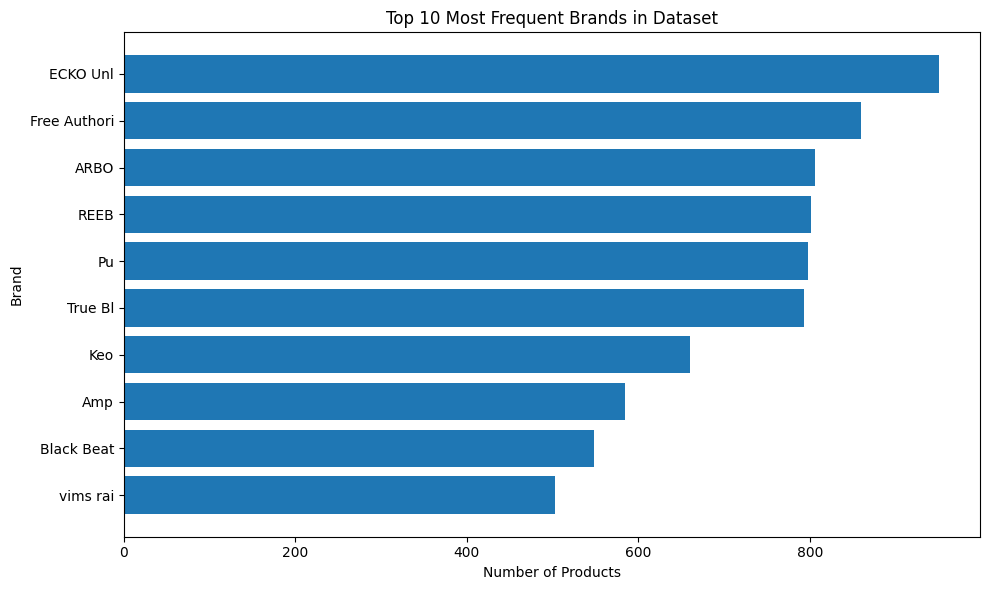

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


brands = [getattr(doc, "brand", None) for doc in docs.values() if getattr(doc, "brand", None)]

brand_counts = Counter(brands)

brand_df = pd.DataFrame(brand_counts.most_common(10), columns=["Brand", "Count"])  # top 10 brands

plt.figure(figsize=(10, 6))
plt.barh(brand_df["Brand"], brand_df["Count"])
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Frequent Brands in Dataset")
plt.gca().invert_yaxis()  # Largest at the top
plt.tight_layout()
plt.show()


__Actual Price vs Selling Price Distributions__

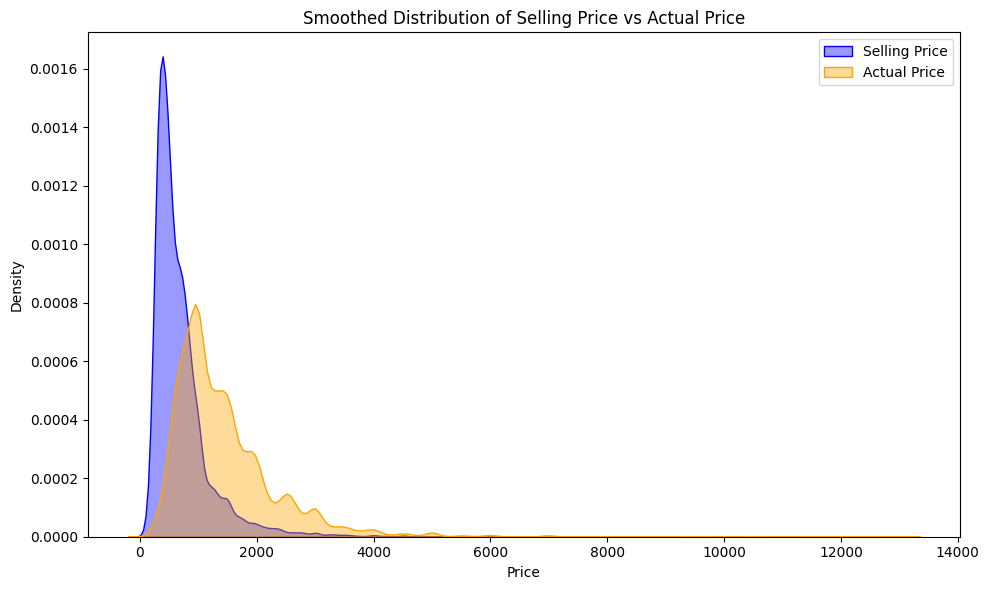

In [11]:
import seaborn as sns

selling_prices = [
    float(doc.selling_price)
    for doc in docs.values()
    if getattr(doc, "selling_price", None) is not None
]

actual_prices = [
    float(doc.actual_price)
    for doc in docs.values()
    if getattr(doc, "actual_price", None) is not None
]

plt.figure(figsize=(10,6))

# KDE for selling price
sns.kdeplot(selling_prices, label="Selling Price", color='blue', fill=True, alpha=0.4)

# KDE for actual price
sns.kdeplot(actual_prices, label="Actual Price", color='orange', fill=True, alpha=0.4)

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Smoothed Distribution of Selling Price vs Actual Price")
plt.legend()
plt.tight_layout()
plt.show()
